<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (12,8)

# Introduce yourself

Put your team name and team-members' names below

Team name: ML Kayumov
Members: Timofey Shunin (BSE162), Natalia Zubkova (BSE161), Ivan Chuev (BSE163)


# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Given information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [16]:
# df_train = pd.read_csv('train.tsv.gz', compression='gzip', sep='\t', index_col=0)
# df_test = pd.read_csv('test_nolabel.tsv.gz', sep='\t', index_col=0)
df_train = pd.read_csv('train.tsv', sep='\t', index_col=0)
df_test = pd.read_csv('test_nolabel.tsv', sep='\t', index_col=0)

In [17]:
df_test.shape

(89251, 18)

In [18]:
df_train.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id', 'sold_fast'],
      dtype='object')

This dataset has several types of columns:
- **Ids**
 - owner_id 
 - product_id 
 - category_id (id of product category)
 - subcategory_id (id of product subcategory)
- **Geographical data and date**
 - region
 - city
 - lat, long
 - date_created
- **Binary features**
 - delivery_available
 - payment_available
 - sold_mode
 - sold_fast
- **Post info**
 - name_text
 - desc_text
 - product_type
 - img_num
 - price
 - properties
 
 Our target is column <i>sold_fast</i>, which shows if the product was sold within first 3 days after the post was released.

Let's get data and labels right away

In [19]:
sold_fast = df_train.loc[:, 'sold_fast']
df_train["date_created"] = pd.to_datetime(df_train["date_created"])

In [20]:
df_train.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


In [21]:
df_train.describe(include='all')

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
count,351281.000000,351281,351281,351281,351281,351281.000000,351281.000000,351281.000000,351281,351281,351281,3.512810e+05,351281,351281.000000,351281,351281,351281.000000,351281.000000,351281.000000
unique,NaN,2299,289,2,333976,NaN,NaN,NaN,212239,305336,2,NaN,351281,NaN,89835,109,NaN,NaN,NaN
top,NaN,Москва,2018-03-25 00:00:00,False,В хорошем состоянии,NaN,NaN,NaN,Платье,98ea16a0d675ca75bc5108d1698b39b4,True,NaN,5597a92d560f63d2a33bccef79db8b34,NaN,[],Московская область,NaN,NaN,NaN
freq,NaN,46973,1756,235747,1129,NaN,NaN,NaN,1772,50,209286,NaN,1,NaN,107402,76281,NaN,NaN,NaN
first,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-10-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.118079,NaN,NaN,NaN,NaN,2.674420,54.494973,55.174965,NaN,NaN,NaN,1.198376e+05,NaN,1.080366,NaN,NaN,1.010732,1018.764619,0.230812
std,8.421389,NaN,NaN,NaN,NaN,1.614119,4.558449,26.451016,NaN,NaN,NaN,2.617846e+07,NaN,0.561307,NaN,NaN,0.103039,840.894302,0.421353
min,1.000000,NaN,NaN,NaN,NaN,1.000000,39.735200,19.888400,NaN,NaN,NaN,0.000000e+00,NaN,1.000000,NaN,NaN,1.000000,101.000000,0.000000
25%,4.000000,NaN,NaN,NaN,NaN,1.000000,53.198600,37.665400,NaN,NaN,NaN,5.000000e+02,NaN,1.000000,NaN,NaN,1.000000,407.000000,0.000000


In [22]:
for i, line in enumerate(df_train[['name_text', 'desc_text']].values[:10]):
    print(i, "|", line[0], "|", line[1])

0 | Стол | Продаю стол раскладной, деревянный, советский на века. Состояние осень хорошее. Торг уместен. Самовывоз ФМР
1 | Посуда | Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. Все ранешний фарфор. В другом пакете современные блюдца, чашки и чайник с мишкой Тедди. Ничем практически не пользовались
2 | Костюм | Новый,с этикеткой. Размер L. Не подошёл по размеру,маломерит на размер. Померить можно ул. 25 Линия 74. В любое удобное для вас время.
3 | Коляска | Складывается тростью, все колеса вниз. Сплошная ручка, сама стоит в сложенном виде, капюшон закрывает до бампера, передние колеса одинарные, по снегу и каше едут. Это аналог пег перего си, только со сплошной ручкой. в БЕЗУПРЕЧНом состоянии (покупалась только чтоб на подготовку к школе старшего водить, зимой ездить, Макларен перестал по снегу из- за сдвоенных колес, буксовал и надо было собирать компактно в машину коляску из сада до школы ехать. 2 раза в неделю использовали по 2 часа)
4 | Волнистые попугаи | Неразлучники, птичкам по 

# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

## Analysing target and binary features

Let's start by analysing the distribution of our binary features in the data.

In [23]:
delivery_ind = df_train.loc[:, 'delivery_available']
no_delivery = sold_fast[delivery_ind == 0]
with_delivery = sold_fast[delivery_ind == 1]

sold_mode_ind = df_train.loc[:, 'sold_mode']
sold_mode_ind.loc[sold_mode_ind == 2] = 0
no_sold_mode = sold_fast[sold_mode_ind == 0]
with_sold_mode = sold_fast[sold_mode_ind == 1]

payment_ind = df_train.loc[:, 'payment_available']
no_payment = sold_fast[payment_ind == 0]
with_payment = sold_fast[payment_ind == 1]

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


We will use pie charts to visualize our distributions

In [24]:
def make_hinges(distrib):
    dcount = len(distrib)
    hinges = [dcount - distrib.sum(), distrib.sum()]
    return hinges 

def plot_binary_pie_chart(axis, title, distrib, labels):
    hinges = make_hinges(distrib)
    return plot_pie_chart(axis, title, hinges, labels)

def plot_pie_chart(axis, title, hinges, labels):
    axis.set_title(title)
    axis.pie(hinges, labels=labels, autopct='%1.1f%%', startangle=90)
    return hinges

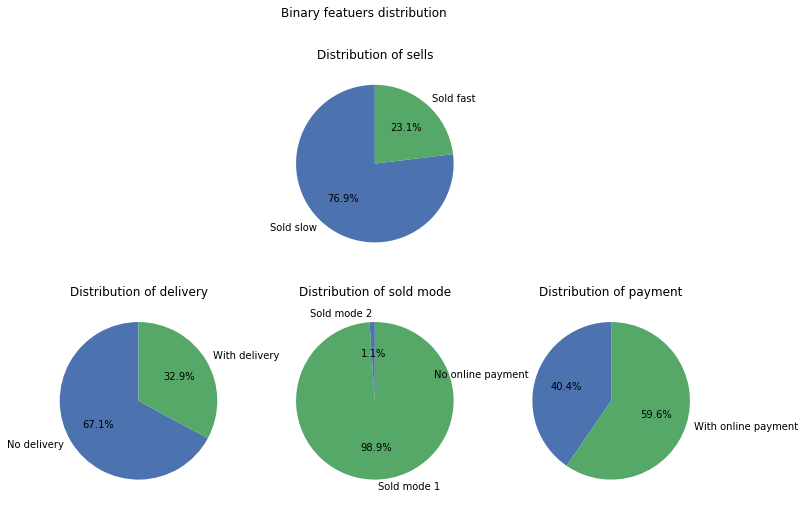

In [25]:
grid = (2, 3)

plt.suptitle("Binary featuers distribution")

sells_ax = plt.subplot2grid(grid, (0, 1))
sells_labels = ["Sold slow", "Sold fast"]
sells_hinges = plot_binary_pie_chart(sells_ax, "Distribution of sells", sold_fast, sells_labels)

delivery_ax = plt.subplot2grid(grid, (1, 0))
delivery_labels = ["No delivery", "With delivery"]
delivery_hinges = plot_binary_pie_chart(delivery_ax, "Distribution of delivery", delivery_ind, delivery_labels)

sold_mode_ax = plt.subplot2grid(grid, (1, 1))
sold_mode_labels = ["Sold mode 2", "Sold mode 1"]
sold_mode_hinges = plot_binary_pie_chart(sold_mode_ax, "Distribution of sold mode", sold_mode_ind, sold_mode_labels)

payment_ax = plt.subplot2grid(grid, (1, 2))
payment_labels = ["No online payment", "With online payment"]
payment_hinges = plot_binary_pie_chart(payment_ax, "Distribution of payment", payment_ind, payment_labels)

plt.show()

In [26]:
from functools import reduce 

def get_influence_labels(sells_labels, other_labels):
    return tuple(f"{other}\n{sells.lower()}" for sells in sells_labels for other in other_labels )

def get_influence_hinges(distrib1, distrib2):
    concat = lambda lists: reduce(lambda x,y: x+y, lists, tuple())
    return concat(zip(*map(make_hinges, [distrib1, distrib2])))

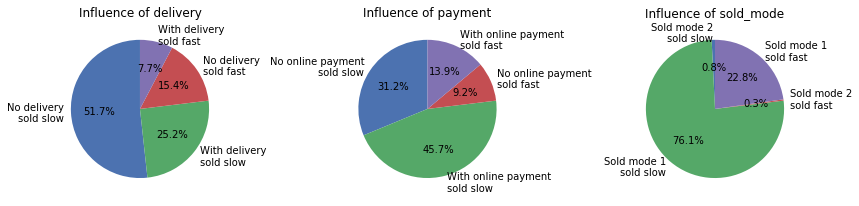

In [27]:
grid = (1, 3)

# plt.suptitle("Influence of binary features on sales")

delivery_ax = plt.subplot2grid(grid, (0, 0), )
inf_delivery_labels = get_influence_labels(sells_labels, delivery_labels)
inf_delivery_hinges = get_influence_hinges(no_delivery, with_delivery)
delivery_hinges = plot_pie_chart(delivery_ax, "Influence of delivery", 
                                        inf_delivery_hinges, inf_delivery_labels)

payment_ax = plt.subplot2grid(grid, (0, 1))
inf_payment_labels = get_influence_labels(sells_labels, payment_labels)
inf_payment_hinges = get_influence_hinges(no_payment, with_payment)
payment_hinges = plot_pie_chart(payment_ax, "Influence of payment", 
                                        inf_payment_hinges, inf_payment_labels)

payment_ax = plt.subplot2grid(grid, (0, 2))
inf_sold_mode_labels = get_influence_labels(sells_labels, sold_mode_labels)
inf_sold_mode_hinges = get_influence_hinges(no_sold_mode, with_sold_mode)
payment_hinges = plot_pie_chart(payment_ax, "Influence of sold_mode", 
                                        inf_sold_mode_hinges, inf_sold_mode_labels)
plt.tight_layout()
plt.show()

We can't really see any correlation of target with these features.

In [28]:
## DONT DELETE THIS. Maybe Histograms will be better than pie charts ^_^
# plt.title('Delivery influence')
# plt.hist([sold_fast[delivery_ind == 0], sold_fast[delivery_ind == 1]], bins=[0, 1, 2], label=['No delivery', 'With delivery'], density=True)
# plt.legend()
# plt.show()

# plt.title('Influence of delivery on sales')
# pies = [len(no_delivery) - no_delivery.sum(), len(with_delivery) - with_delivery.sum()] + [no_delivery.sum(), with_delivery.sum()]
# labels = ['NoD Sold slow', 'D Sold slow'] + ['NoD Sold fast', 'D Sold fast']
# plt.pie(pies, labels=labels, 
#         autopct='%1.1f%%', startangle=90)
# plt.show()

## Analysing geographical and temporal features

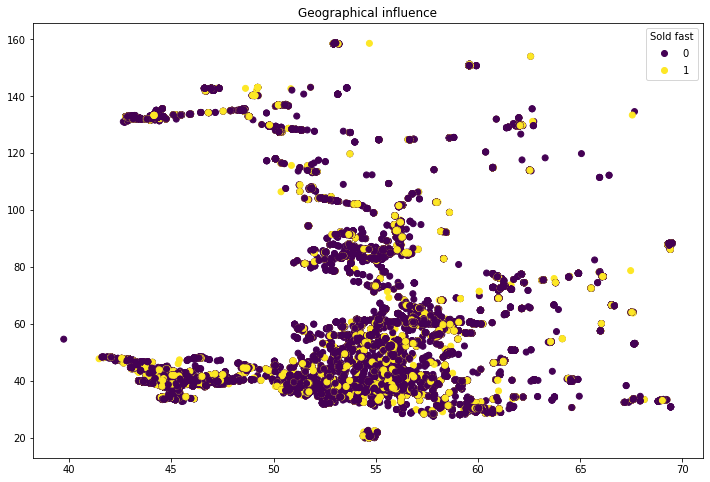

In [277]:
plt.title('Geographical influence')
scatter = plt.scatter(df_train.lat, df_train.long, c=sold_fast)
plt.legend(*scatter.legend_elements(),
                    loc="best", title="Sold fast")
plt.show()

### Histograms
0 target on the left, 1 on the right.

In [367]:
is_region = lambda x: any(word in x for word in ('область', 'край', 'округ'))

def get_group_hinges(groups):
    return list(map(lambda x: x.shape[0], groups))

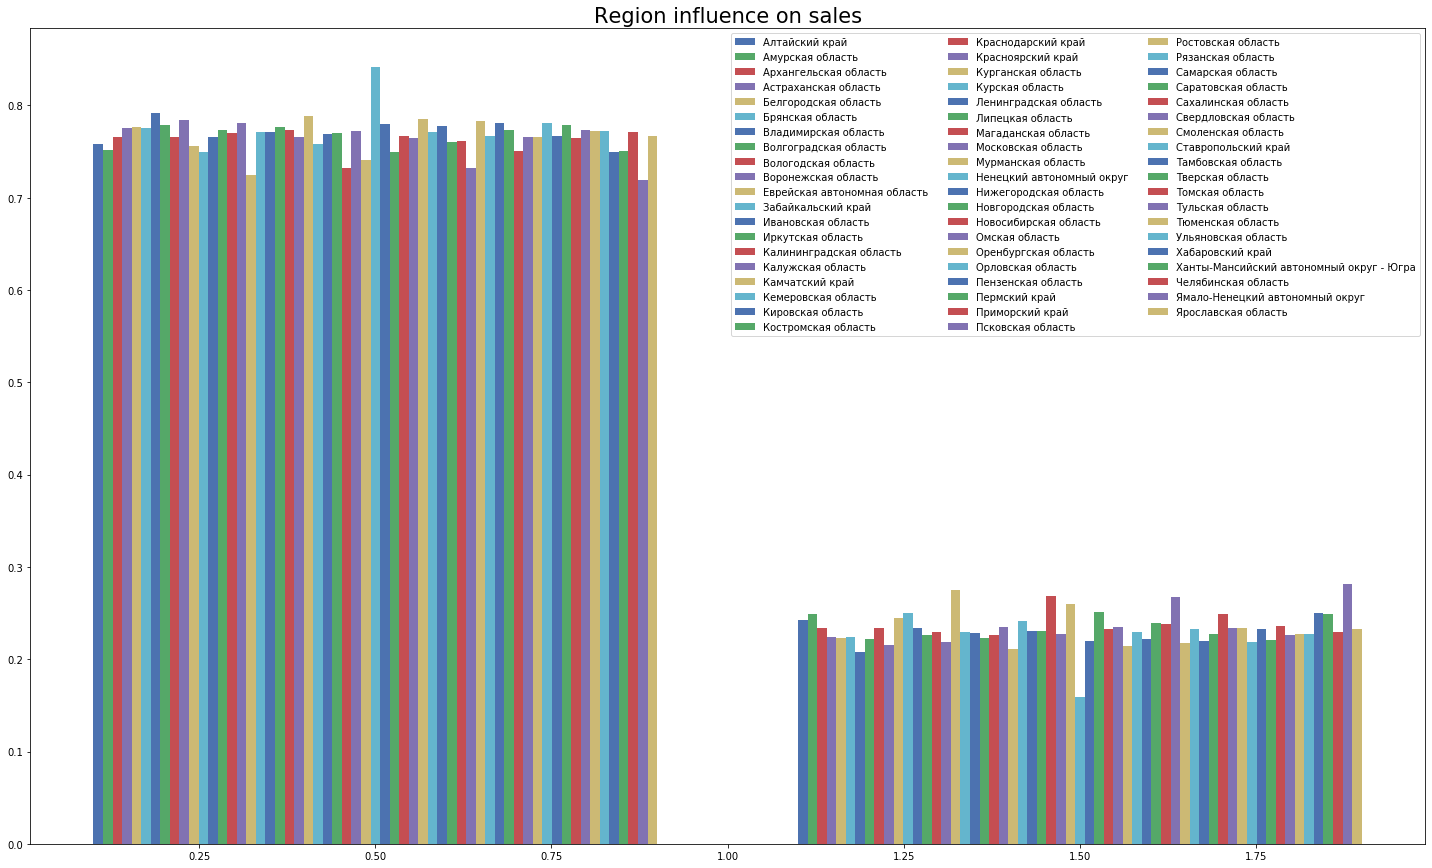

In [285]:
fig = plt.figure(figsize=(25, 15))
plt.title('Region influence on sales', fontsize=21)

# todo get group hinges                         
hists = [sold_fast[df.index] for name, df in df_train.groupby('region', sort=True) if is_region(name)]

plt.hist(hists, bins=[0, 1, 2], label=sorted(i for i in df_train.region.unique() if is_region(i)), density=True)
plt.legend(ncol=3)
plt.show()

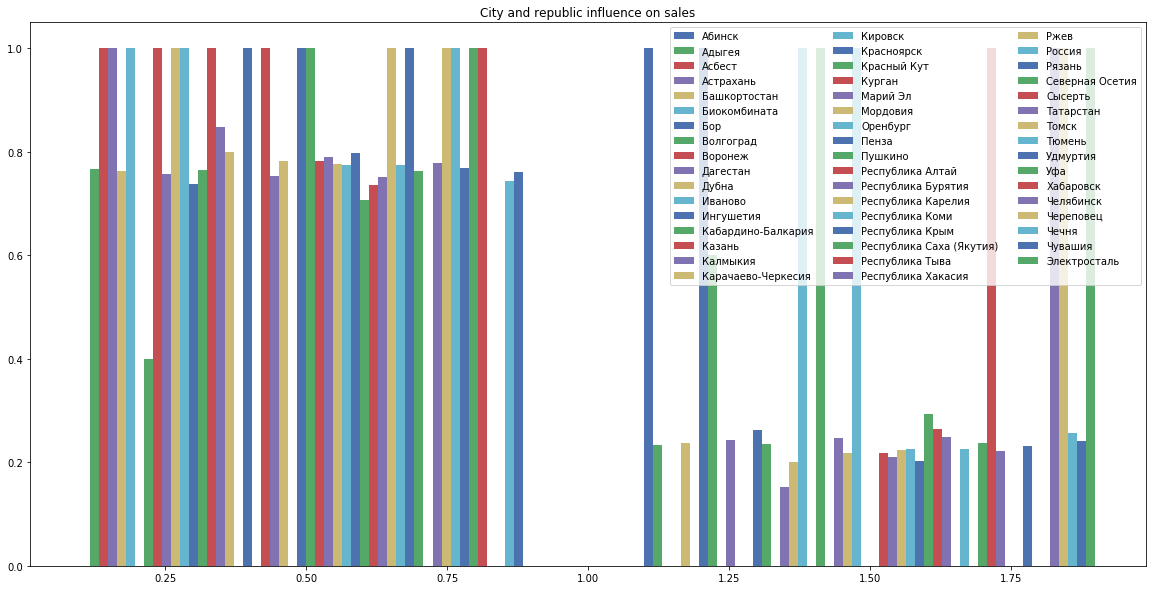

In [286]:
fig = plt.figure(figsize=(20, 10))
plt.title('City and republic influence on sales')

# todo get group hinges and piechart
hists = [sold_fast[df.index] for name, df in df_train.groupby('region', sort=True) if not is_region(name)]

plt.hist(hists, bins=[0, 1, 2], label=sorted(i for i in df_train.region.unique() if not is_region(i)), density=True)
plt.legend(ncol=3)
plt.show()

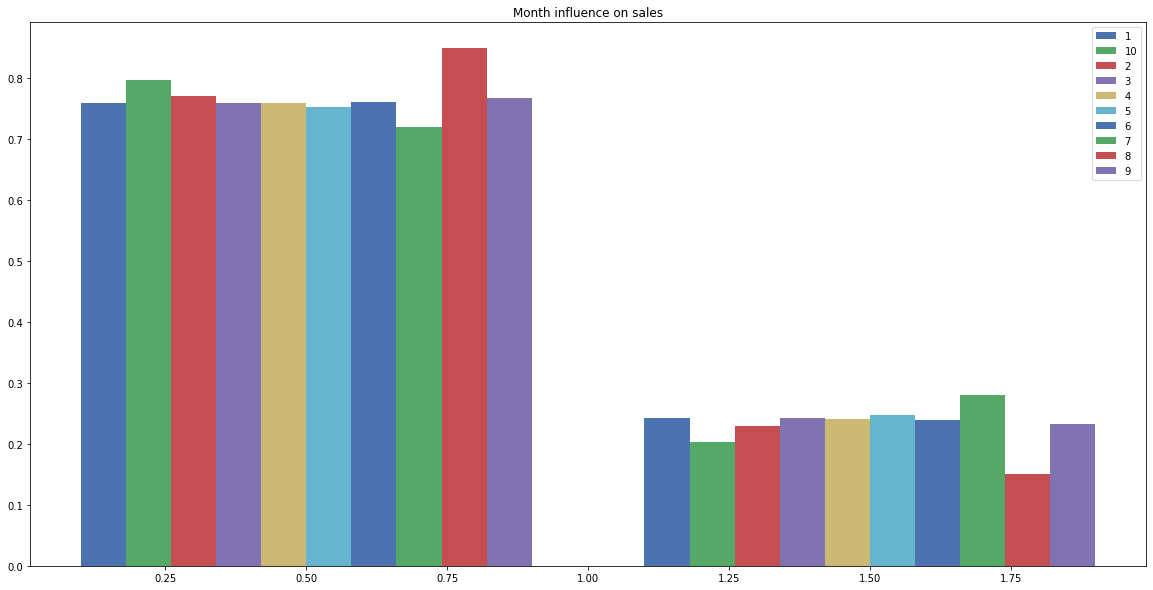

In [287]:
fig = plt.figure(figsize=(20, 10))
plt.title('Month influence on sales')
# get group hinges and pie cjart
months = df_train.date_created.apply(lambda x: x.month)
group_labels, df_groups = zip(*df_train.groupby(months))
hists = [sold_fast[df.index] for df in df_groups]
plt.hist(hists, bins=[0, 1, 2], label=sorted(map(str, group_labels)), density=True)
plt.legend()
plt.show()

Again, no evident correlation :(

In [29]:
# Maybe do plot of (date.is_holiday) -> (sales) 

## Analysing ids

In [303]:
np.array(sorted(df_train.category_id.unique()))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  20,  21,  22,  23,  24,  25, 100])

In [304]:
np.array(sorted(df_train.subcategory_id.unique()))

array([  101,   102,   104,   105,   106,   107,   108,   109,   110,
         111,   112,   113,   114,   116,   117,   118,   119,   121,
         201,   202,   203,   205,   206,   208,   209,   210,   211,
         212,   213,   214,   215,   216,   217,   301,   309,   310,
         311,   312,   313,   314,   316,   317,   318,   319,   320,
         401,   402,   403,   404,   405,   406,   407,   408,   409,
         410,   411,   413,   414,   415,   416,   417,   502,   503,
         504,   505,   506,   507,   508,   509,   510,   601,   602,
         603,   604,   605,   606,   607,   608,   609,   610,   611,
         701,   702,   703,   704,   705,   706,   707,   708,   709,
         710,   711,   712,   801,   802,   803,   804,   805,   806,
         807,   808,   809,   810,   811,   814,   816,   818,   901,
         902,   903,   904,   905,   906,   907,   908,   909,   910,
         911,   912,   914,   919,   920,   921,   922,  1001,  1002,
        1003,  1004,

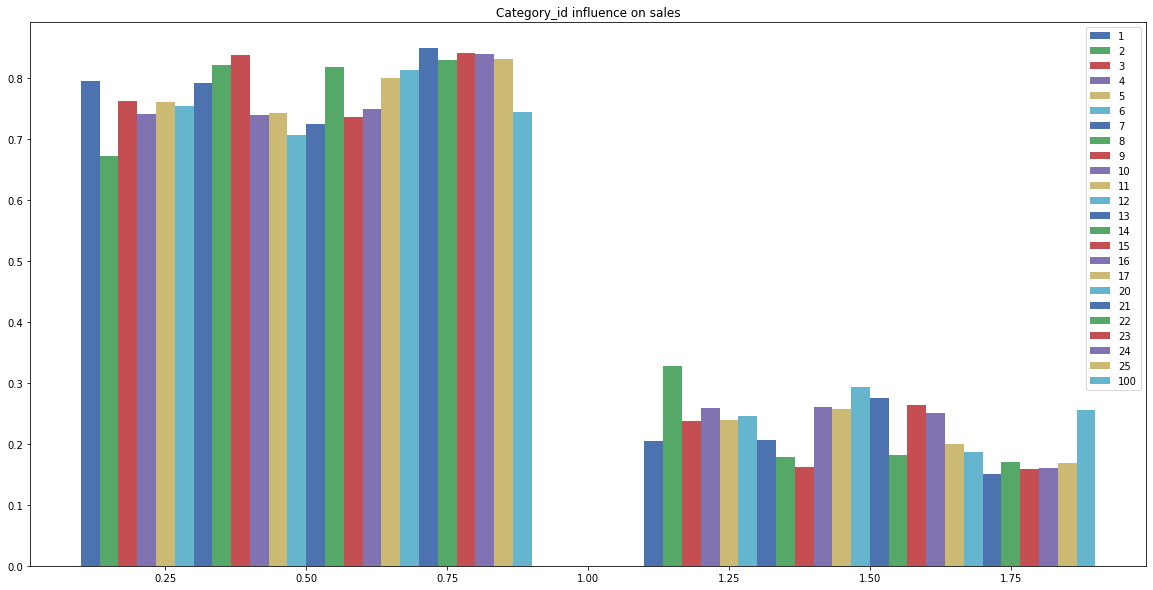

In [305]:
fig = plt.figure(figsize=(20, 10))
plt.title('Category_id influence on sales')
# get group hinges and pie cjart

hists = [sold_fast[df.index] for num, df in df_train.groupby('category_id', sort=True)]

plt.hist(hists, bins=[0, 1, 2], label=sorted(df_train.category_id.unique()), density=True)
plt.legend()
plt.show()

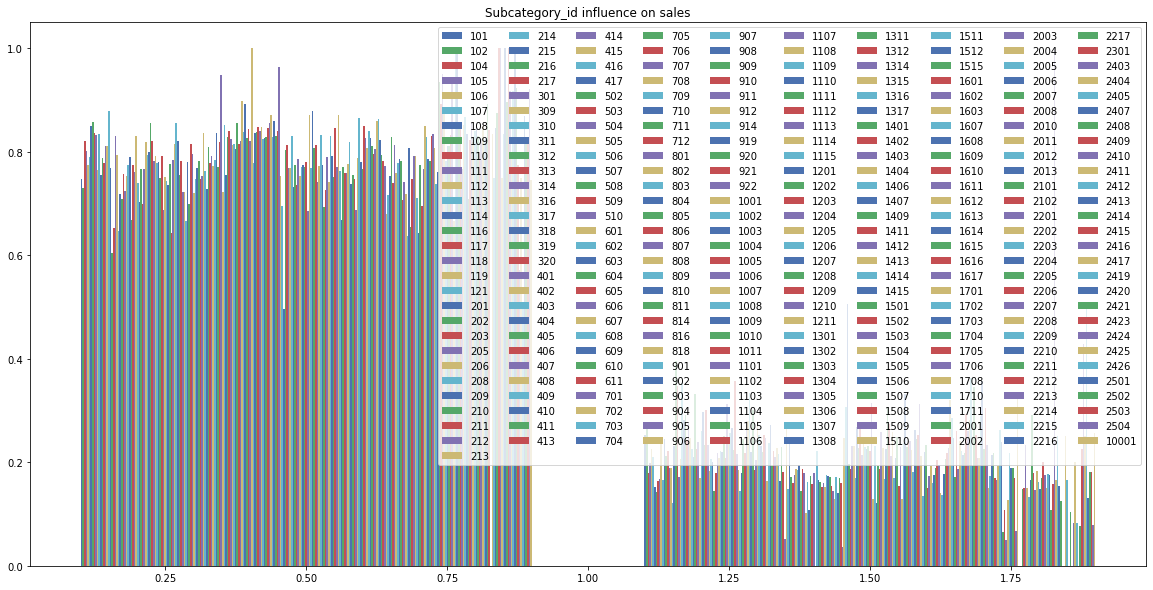

In [306]:
# well this is not good. 
fig = plt.figure(figsize=(20, 10))
plt.title('Subcategory_id influence on sales')
# get group hinges and pie cjart

hists = [sold_fast[df.index] for num, df in df_train.groupby('subcategory_id', sort=True)]

plt.hist(hists, bins=[0, 1, 2], label=sorted(df_train.subcategory_id.unique()), density=True)
plt.legend(ncol=10)
plt.show()

## Analysing post info

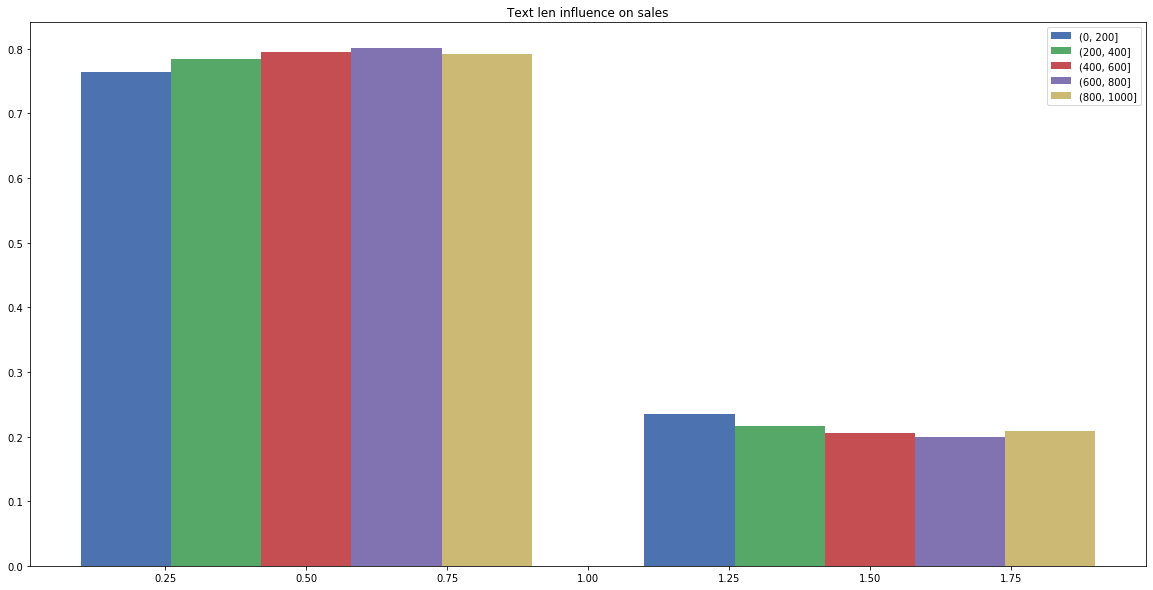

In [112]:
fig = plt.figure(figsize=(20, 10))
plt.title('Text len influence on sales')

bins = np.arange(0, 1200, 200)
textlen_group = pd.cut(df_train.desc_text.apply(len), bins=bins)
group_labels, df_groups = zip(*df_train.groupby(textlen_group))

hists = [sold_fast[df.index] for df in df_groups]

plt.hist(hists, bins=[0, 1, 2], label=sorted(map(str, group_labels)), density=True)
plt.legend()
plt.show()

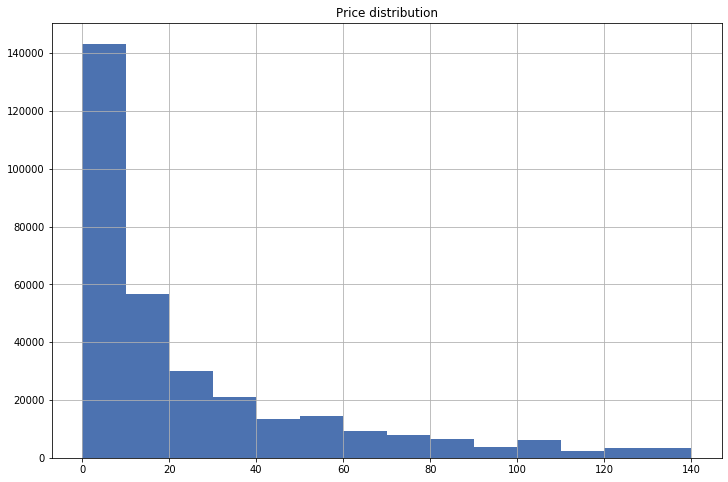

In [344]:
# probably show description
# df_train.price.apply(lambda x: x/100).describe().astype(int)

plt.title("Price distribution")
price_rubles = df_train.price.apply(lambda x: x/100)
price_bins = np.arange(0, 150, 10)
price_rubles.hist(bins=price_bins)
plt.show()

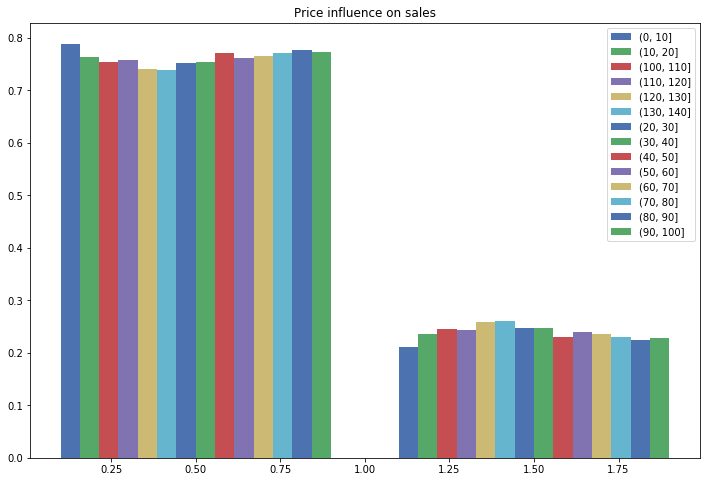

In [345]:
plt.title('Price influence on sales')

price_groups = pd.cut(price_rubles, bins=price_bins)
group_labels, df_groups = zip(*df_train.groupby(price_groups))

hists = [sold_fast[df.index] for df in df_groups]

plt.hist(hists, bins=[0, 1, 2], label=sorted(map(str, group_labels)), density=True)
plt.legend()
plt.show()

Price doesn't cause products to be sold faster.

In [386]:
# todo show product_type random messages

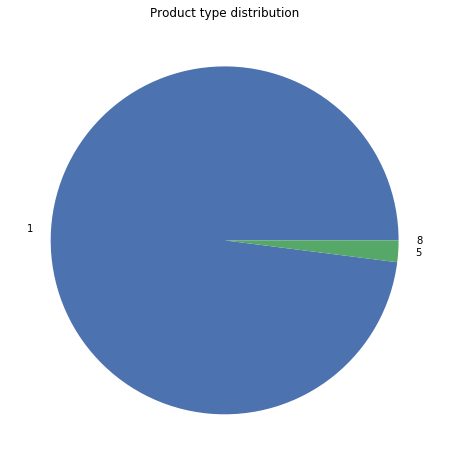

In [366]:
plt.title('Product type distribution')
hinges = list(map(lambda x: x.shape[0], df_groups))
plt.pie(hinges, labels=group_labels)
plt.show()

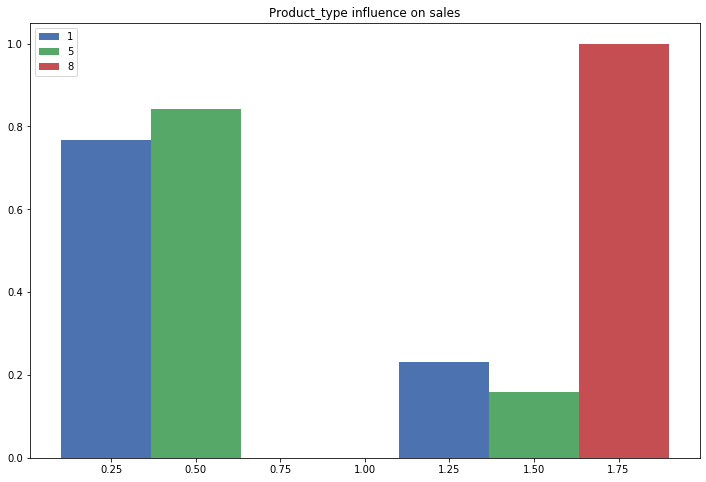

In [346]:
plt.title('Product_type influence on sales')
group_labels, df_groups = zip(*df_train.groupby('product_type'))

hists = [sold_fast[df.index] for df in df_groups]

plt.hist(hists, bins=[0, 1, 2], label=sorted(map(str, group_labels)), density=True)
plt.legend()
plt.show()

In [356]:
df_train[df_train.product_type == 8]

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id
395799,24,Москва,2018-08-10,False,Обязанности: поиск оптовых и оптово-розничных ...,1,55.7701,37.6069,Менеджер по продажам,990c437771e99f6dcdb1a1455b07102e,False,50000.0,19d8a46bfc4a5563a16ede823e260e7c,8,"[{'slug_id': 'vacancy_advert_type', 'slug_name...",Московская область,1,2414


In [368]:
df_train.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id'],
      dtype='object')

In [385]:
df_train[df_train.product_type == 1].tail()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id
508541,2,Москва,2018-10-14,False,Машинка в рабочем состоянии. Загрузка до 4 кил...,1,55.8144,37.6502,Стиральная машина indesit,917b4d4e90a58f1b5f6bba6902b625da,True,1700.0,c115cf5ff8d5d3efaf3896c5e0972ed2,1,"[{'slug_id': 'stiralnye_mashiny_marka', 'slug_...",Московская область,1,208
508542,22,Белгород,2018-06-13,False,Красные проданы.20 размер,1,50.5853,36.6243,Босоножки,d9f022939b80684ed53c73e2ef676e21,False,50.0,dc033274f70a7cb187fa3c04713267b5,1,"[{'slug_id': 'detskie_obuv_razmer', 'slug_name...",Белгородская область,1,2209
508543,12,Санкт-Петербург,2018-03-02,True,"Планшет полностью рабочий, в прекрасном состоя...",4,60.0121,30.3792,"Планшет SAMSUNG GT-P5110 16Gb, 10 дюймов",2e6162316e2822112c58201cff67baa4,True,3500.0,3af0dacb0c13df9a60d49b8693842eb9,1,"[{'slug_id': 'planshety_diagonal_ekrana', 'slu...",Ленинградская область,1,1203
508547,3,Оричи,2018-03-23,False,В наличии.Доставка в КИРОВ.,4,58.4008,49.0518,ПОВЯЗКИ И НАБОРЫ,8067c466525f6e4b89b0f53a1cf0abca,False,130.0,376bb448f0c27c632ca1dea34e9fa39d,1,[],Кировская область,1,301
508548,3,Алапаевск,2018-01-14,False,На батарейках,2,57.8533,61.6482,Качелька,a1497b7c15e218b2a34bdc537165482d,True,700.0,e5cec098bf5b07d1556e6fe1a24c1334,1,[],Свердловская область,1,317


Int64Index([     1,      2,      4,      6,     10,     11,     12,     13,
                14,     15,
            ...
            508535, 508537, 508538, 508539, 508540, 508541, 508542, 508543,
            508547, 508548],
           dtype='int64', length=351281)

Based on initial analysis we propose the following features:
- **Ids**
 - category_id 
 - subcategory_id 
- **Geographical data and date**
 - region
 - lat, long
 - month_created
- **Binary features**
 - delivery_available
 - payment_available
 - sold_mode #(maybe will fire with some other binary feature)
- **Post info**
 - name_text
 - desc_text
 - product_type #(probably use different models for cars and other stuff)
 - img_num
 - price in roubles


# Experiments

## Best solution

Our best solution placed in [Catboost_best_solution.ipynb](./Catboost_best_solution.ipynb)

It's scores:  
AUC on train set:  0.708  
AUC on validation set:  0.637  
AUC on leaderbord: 0.629  

We trained Catboost classifier with learning_rate=0.1, iterations=2000, depth=4 (after experimenting with params, these turned out to work well & not too long)
And with features:  
- 'lat', 'long', 'price', 'sold_mode', 'img_num'
- 'date_created'
- payment_available', 'delivery_available'
- 'price' * 'product_type'
- 'sold_mode' * 'subcategory_id'
- 'sold_mode' * 'price'
- ifidf matrix on 'name_text'
- ifidf matrix on 'desc_text'
- ifidf matrix on text of 'properties'
- one hot encoded features: 'region', 'category_id', 'subcategory_id', 'sold_mode', 'product_type'

## experimet 2

This experiment places in [Catboost_v2.ipynb](./Catboost_v2.ipynb)

is has slite less scores:
AUC on train set: 0.695  
AUC on validation set: 0.623  

Is also was trained used Catboost classifier with learning_rate=0.1, iterations=2000, depth=4
More information about features can be found in file [Catboost_v2.ipynb](./Catboost_v2.ipynb)

## experiment 3

We also tried some other features. One of this is: cat2prob.
Features has been calculated using this pease of code:

```python
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import combinations, chain


class Cat2Proba(BaseEstimator, TransformerMixin):
    def __init__(self, keys, ngram=1):
        self.keys = keys
        self.combs = list(chain(*map(lambda x: combinations(keys, x), range(1, ngram+1))))
        self.ngram = ngram
        self.cat_dicts = {}
        self.cat_av = {}
        
    @staticmethod
    def values(comb, X):
        return np.array(list(map(lambda x: ' '.join(list(map(str, x))), X[list(comb)].values)))
    
    @staticmethod
    def cat2proba_dict(values, labels):
        cat_dict = {}
        probas = []
        for aval in np.unique(values):
            labels_for_val = labels[values == aval]
            cat_dict[aval] = float(len(labels_for_val[labels_for_val == 1])) / len(labels_for_val)
        return cat_dict
    
    @staticmethod
    def cat2proba(cat_dict, cat_av, values):
        probas = []
        for aval in values:
            if aval in cat_dict:
                probas.append(cat_dict[aval])
            else:
                probas.append(cat_av)
        return np.array(probas)
    
    def fit(self, X, y):
        for comb in tqdm(self.combs):
            self.cat_dicts[comb] = Cat2Proba.cat2proba_dict(Cat2Proba.values(comb, X), y)
            self.cat_av[comb] = np.average(list(self.cat_dicts[comb].values()))
        return self
    
    def transform(self, X, y=None):
        return np.array([Cat2Proba.cat2proba(
            self.cat_dicts[comb],
            self.cat_av[comb],
            Cat2Proba.values(comb, X)
        ) for comb in self.combs]).T
```

But these features were rather specific and it overfits a model

## experiment 4

Also we tried fast text model on texts. [fastText+lemmatization.ipynb](./fastText+lemmatization.ipynb)  
We tried lemmatizing all texts, feeding them to fastText, extracting fastText prediction probability of the positive class and adding it as a feature to the dataset.

## experiment 5

[Simple_models.ipynb](./Simple_models.ipynb)  
In Simple models, we tried different categorical feature encoding and developing 2 separate models for 2 product_types (based on distribution in data analysis), which also didn't resut in much.